Got the load and join data from:
https://colab.research.google.com/drive/1zfdTF1u1FpoVOvD_b7sfuXfiPdxYkVbL?usp=sharing


#Load, Join & Clean Data

##Explanation of Dataset Usage


For a simple model, all that is needed are users with unique ids rating and movies with unique ids. It's enough for matrix factorization, and even using the movie vectors to use for a neural network embedding.

However, for a more nuanced model with better performance, there is other data that can be very helpful

The Movie Lens dataset supplies us with users with unique ids rating titled movies with unique ids. Addtionally, it supplies genre and release date which will be helpful for the hybrid model. For the hybrid model, I will take the genres which are already one hot encoded for me. In addition to the genres, I will also take user information from the u.user dataset. I will take the age of the users, gender and profession. I normalized the age by dividing by the max age, and one-hot encoded the gender and professions. 
The user id in u.users and the movielens dataset match up, makeing the join easy.

Using the movie lens dataset gave me 80k points to use for training. I believe that was enough points and that fact that my RMSE was around 1 for my models with an unseen test dataset shows me that the movie lens dataset was enough.

## Movie Lens

- ratings: has the user ratings, and a timestamp of when they happened 
- items: has the movie titles, and the genre info 
 - Note: Both use the same movieId. This will be helpful when I need to match the genre with the movie for the bybrid model.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# movielens data
ratings = pd.read_csv("http://files.grouplens.org/datasets/movielens/ml-100k/u1.base",sep='\t',header=None, names=["userId", "movieId", "rating", "timestamp"])

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
...,...,...,...,...
79995,943,1067,2,875501756
79996,943,1074,4,888640250
79997,943,1188,3,888640250
79998,943,1228,3,888640275


In [ ]:
ml_movies = pd.read_csv("http://files.grouplens.org/datasets/movielens/ml-100k/u.item", 
                    sep='|', 
                    header=None, 
                    encoding="latin1",
                    names=["ml_movieId", "title", "date released", "video_release_date", "link", "genre_unknown", "Action", "Adventure", "Animation", "Family", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Music", "Mystery", "Romance", "Science Fiction", "Thriller", "War", "Western"])

In [ ]:
ml_movies

,ml_movieId,title,date released,video_release_date,link,genre_unknown,Action,Adventure,Animation,Family,...,Fantasy,Film-Noir,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
users = pd.read_csv("https://files.grouplens.org/datasets/movielens/ml-100k/u.user",sep='|',header=None, names=["userId", "age", "gender", "profession", "zipcode"])

In [ ]:
users

,userId,age,gender,profession,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [ ]:
max_age = users.max()[1]
print(max_age)

73


In [ ]:
#divide age by max age to normalize
users.age = users.age.apply(lambda x: x / 73)
#one hot encode gender and professions
users = pd.get_dummies(users, columns = ['gender'])
users = pd.get_dummies(users, columns = ['profession'])


In [ ]:
users

,userId,age,zipcode,gender_F,gender_M,profession_administrator,profession_artist,profession_doctor,profession_educator,profession_engineer,...,profession_marketing,profession_none,profession_other,profession_programmer,profession_retired,profession_salesman,profession_scientist,profession_student,profession_technician,profession_writer
0,1,0.328767,85711,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0.726027,94043,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,0.315068,32067,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,0.328767,43537,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0.452055,15213,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,939,0.356164,33319,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
939,940,0.438356,02215,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,941,0.273973,97229,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
941,942,0.657534,78209,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
users_list = pd.DataFrame (users, columns = ['userId', 'age', 'zipcode', 'gender_F', 'gender_M', 'profession_administrator','profession_artist', 'profession_doctor', 'profession_educator', 'profession_engineer', 'profession_entertainment',  'profession_executive', 'profession_healthcare',  'profession_homemaker',  'profession_lawyer',  'profession_librarian', 'profession_marketing', 'profession_none', 'profession_other', 'profession_programmer', 'profession_retired', 'profession_salesman',  'profession_scientist', 'profession_student', 'profession_technician', 'profession_writer' ])

users_list

,userId,age,zipcode,gender_F,gender_M,profession_administrator,profession_artist,profession_doctor,profession_educator,profession_engineer,...,profession_marketing,profession_none,profession_other,profession_programmer,profession_retired,profession_salesman,profession_scientist,profession_student,profession_technician,profession_writer
0,1,0.328767,85711,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0.726027,94043,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,0.315068,32067,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,0.328767,43537,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0.452055,15213,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,939,0.356164,33319,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
939,940,0.438356,02215,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,941,0.273973,97229,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
941,942,0.657534,78209,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Test Dataset**

Below is the u1.test which will be used as a final test.

In [ ]:
test = pd.read_csv("http://files.grouplens.org/datasets/movielens/ml-100k/u1.test",sep='\t',header=None, names=["userId", "movieId", "rating", "timestamp"])

In [ ]:
test

,userId,movieId,rating,timestamp
0,1,6,5,887431973
1,1,10,3,875693118
2,1,12,5,878542960
3,1,14,5,874965706
4,1,17,3,875073198
...,...,...,...,...
19995,458,648,4,886395899
19996,458,1101,4,886397931
19997,459,934,3,879563639
19998,460,10,3,882912371


# **Baseline Model**

I created a baseline model using the mean of ratings as specified in requirements doc. For each movie, I found the average rating of that movie across all users. That average is the prediction for what any given user will rate the movie. 

For calculating the average rating, I used the rating dataset as that has the ratings for all the users for each movie. 

Then, to calculate the rmse, I used the average of ratings as the training data and the actual rating for each movie given by each user as the test data. 

In [ ]:
#get the user rating from the ratings dataset:
user_ratings = ratings.filter(['movieId','rating'], axis=1)
user_ratings
y_test = test.rating


In [ ]:
# take the average rating of each movie:
average_ratings = ratings.groupby('movieId', as_index=False)['rating'].mean()
sorted_average_ratings = average_ratings.sort_values(by='rating', ascending=False)
y_pred = sorted_average_ratings
y_pred

,movieId,rating
1181,1189,5.0
1620,1653,5.0
1566,1599,5.0
1479,1500,5.0
1449,1467,5.0
...,...,...
1468,1486,1.0
1097,1104,1.0
1568,1601,1.0
438,439,1.0


In order to pass the prediction and test data into the rmse function, you have to edit the prediction data so that it lines up with the test data.
That is what I do below. It takes about 20 seconds to run

In [ ]:
predicted_ratings = []

for id in test.movieId:
  try:
    y_pred.loc[y_pred.movieId == id]
    predicted_ratings.append(y_pred.loc[y_pred.movieId == id].rating.tolist()[0])
  except Exception as e:
    test = test.loc[test.movieId != id ]
    continue
predicted_ratings[0:10]
print(len(predicted_ratings))
print(len(test))

19968
19968


**RMSE Value for Baseline Model**

In [ ]:
from sklearn.metrics import mean_squared_error
import math
y_test = test.rating
mse = mean_squared_error(predicted_ratings, y_test)
rmse = math.sqrt(mse)
print(f'RMSE: {rmse}')

RMSE: 1.0314196522331975


As you can see, I got an RMSE of around 1 which is a reasonable rmse as Dave said in slack

In [ ]:
ratings = pd.read_csv("http://files.grouplens.org/datasets/movielens/ml-100k/u1.base",sep='\t',header=None, names=["userId", "movieId", "rating", "timestamp"])
test = pd.read_csv("http://files.grouplens.org/datasets/movielens/ml-100k/u1.test",sep='\t',header=None, names=["userId", "movieId", "rating", "timestamp"])

# **Simple Model**

For the simple model, I used Collabarative Filtering. I decided to try three different types of matrix factorizations and see which one got the best RMSE. I used SVD for the first model, the turicreate class for the second class and the matrix_factorization class for the third model.  

In [ ]:
#Get the number of unique users and movies
n_users = ratings.userId.unique().shape[0]
n_items = ratings.movieId.unique().shape[0]
print(n_users)
print(n_items)

943
1650


# **SVD Model**

Got the basis for the Singular Value Decomposition (SVD) code from here:

https://www.jiristodulka.com/post/recsys_cf/

In [ ]:
pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 18.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633741 sha256=9a05a6fe1217efd08f4c8cbf8bd4c778c1830579180077ff9f8de208794b27ad
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


I performed the following steps with train/val/test:

I split the data into train and val data

I ran SVD with different values of n_factors and evaluated performance of these approximations on the validation set and choose the n_factors with the lowest value of RMSE.

I applied the chosen model on test dataset to see how it performs on unseen data and got the RMSE.

In [ ]:
from surprise import SVD
from surprise.reader import Reader # this class is used to parse the ratings dataset as it contains ratings
from surprise import Dataset
from sklearn.model_selection import train_test_split

# I dont need the y varibale, just setting it so I do not get an error.
#Splitting the data into 80% train and 20% test
X_train, X_val, y_train, y_val = train_test_split(ratings, ratings, test_size=0.2, random_state = 42) 

reader = Reader(rating_scale=(1, 5)) # set it to 1-5 as that is the range of the ratings
data = Dataset.load_from_df(X_train[["userId",	"movieId",	"rating"]], reader=reader)
trainset = data.build_full_trainset()

#create the SVD mocdel and fit it
#I set n_factors to 2 as that got the best RMSE as can be seen in the next code cell. 
SVD_model = SVD(n_factors = 2, lr_all=.01, reg_all=.0001)
#training the dataset with train data
SVD_model.fit(trainset)

In [ ]:
#running SVD with different values of n_factors on the val data
from surprise import accuracy
from surprise.model_selection import train_test_split as tts
for i in range (1,20):
  reader = Reader(rating_scale=(1, 5)) # set it to 1-5 as that is the range of the ratings
  data = Dataset.load_from_df(X_train[["userId",	"movieId",	"rating"]], reader=reader)
  trainset = data.build_full_trainset()
  SVD_model = SVD(n_factors = i, lr_all=.01)
  SVD_model.fit(trainset)
  val_data = Dataset.load_from_df(X_val[["userId",	"movieId",	"rating"]], reader=reader)
  trainset, testset = tts(val_data, test_size=.000000000000000001, random_state = 42)
  test_set = trainset.build_testset() #Return a list of ratings that can be used as a testset in the test() method.
  predictions = SVD_model.test(test_set)
  print(accuracy.rmse(predictions))

RMSE: 0.9441
0.9441213453706617
RMSE: 0.9419
0.9419181604952445
RMSE: 0.9439
0.9439055057450595
RMSE: 0.9475
0.9475111555680957
RMSE: 0.9483
0.9483406761895137
RMSE: 0.9494
0.9494299456260195
RMSE: 0.9497
0.9497049635664565
RMSE: 0.9438
0.943786790377737
RMSE: 0.9534
0.9534227766834524
RMSE: 0.9490
0.9489755483248434
RMSE: 0.9454
0.9453614811834036
RMSE: 0.9464
0.9463766854137257
RMSE: 0.9501
0.9500674068772555
RMSE: 0.9548
0.9548396221349348
RMSE: 0.9568
0.9568121064014644
RMSE: 0.9530
0.9530332922945791
RMSE: 0.9559
0.9559180196898005
RMSE: 0.9573
0.9573406945360556
RMSE: 0.9613
0.9613416607291424


As you can see above, the SVD model with of n_factors=2 had the lowest RMSE

In [ ]:
#getting the test data ready to see how the SVD model performs on unseen data and get the RMSE 
from surprise.model_selection import train_test_split as tts
reader = Reader(rating_scale=(1, 5)) # set it to 1-5 as that is the range of the ratings
test_data = Dataset.load_from_df(test[["userId",	"movieId",	"rating"]], reader=reader)
trainset, testset = tts(test_data, test_size=.000000000000000001, random_state = 42)
test_set = trainset.build_testset()
predictions = SVD_model.test(test_set)

# **RMSE of SVD Model**

In [ ]:
accuracy.rmse(predictions)

RMSE: 0.9679


0.967888987610967

As you can see, the SVD model got an RMSE of around .96, which is pretty solid.

In [ ]:
ratings = pd.read_csv("http://files.grouplens.org/datasets/movielens/ml-100k/u1.base",sep='\t',header=None, names=["userId", "movieId", "rating", "timestamp"])
test = pd.read_csv("http://files.grouplens.org/datasets/movielens/ml-100k/u1.test",sep='\t',header=None, names=["userId", "movieId", "rating", "timestamp"])

# **Turicreate Model**

Source for this:

https://apple.github.io/turicreate/docs/api/generated/turicreate.recommender.item_similarity_recommender.ItemSimilarityRecommender.evaluate.html

In [ ]:
! pip install turicreate

In [ ]:
import turicreate

In [ ]:
#Training the model
#changing the names of the column headers so the model works
ratings = ratings.rename(columns={'userId': 'user_id', 'movieId': 'item_id'})
test = test.rename(columns={'userId': 'user_id', 'movieId': 'item_id'})

#convert data to SFrame
data = turicreate.SFrame(ratings)
train_d, test_d = turicreate.recommender.util.random_split_by_user(data)
m = turicreate.recommender.create(train_d, target='rating')
test_data = turicreate.SFrame(test)

Preparing data set.

Data has 63996 observations with 943 users and 1622 items.

Data prepared in: 0.109254s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 63996 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 16.6667           | Not Viable                               |

| 1       | 4.16667           | Not Viable                               |

| 2       | 1.04167           | Not Viable                               |

| 3       | 0.260417          | 1.63468                                  |

| 4       | 0.130208          | 1.50538                                  |

| 5       | 0.0651042         | 1.4593                                   |

| 6       | 0.0325521         | 1.6669                                   |

| 7       | 0.016276          | 1.98701                                  |

| 8       | 0.00813802        | 2.13373                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0651042         | 1.4593                                   |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 90us         | 2.44677           | 1.1171                |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 178.646ms    | 2.14028           | 1.13806               | 0.0651042   |

| 2       | 339.386ms    | 1.93496           | 1.06372               | 0.0651042   |

| 3       | 508.853ms    | 1.81605           | 1.01509               | 0.0651042   |

| 4       | 674.752ms    | 1.74871           | 0.992464              | 0.0651042   |

| 5       | 841.91ms     | 1.70133           | 0.976193              | 0.0651042   |

| 10      | 1.63s        | 1.54521           | 0.917235              | 0.0651042   |

| 25      | 4.00s        | 1.3426            | 0.817629              | 0.0651042   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 1.34764

Final training RMSE: 0.798866

As you can see, the Final training RMSE is .8 which is very good. 

Test the turicreate model on the test data.

In [ ]:
eval = m.evaluate(test_data)


Precision and recall summary statistics by cutoff
+--------+---------------------+----------------------+
| cutoff |    mean_precision   |     mean_recall      |
+--------+---------------------+----------------------+
|   1    |  0.3376906318082788 | 0.01054490577329334  |
|   2    | 0.32570806100217864 | 0.019572619625913664 |
|   3    |  0.3021060275962237 | 0.02750305887858495  |
|   4    |  0.2979302832244008 | 0.038448056888710086 |
|   5    | 0.29150326797385623 | 0.04798373849955808  |
|   6    |  0.2839506172839507 | 0.05352832111368813  |
|   7    |  0.2794895736072209 | 0.06007023555763848  |
|   8    |  0.2739651416122004 | 0.06677994662862105  |
|   9    | 0.27281529895908996 | 0.07508605096545626  |
|   10   | 0.26840958605664494 | 0.08133809359528169  |
+--------+---------------------+----------------------+
[10 rows x 3 columns]


Overall RMSE: 1.042038046608013

Per User RMSE (best)
+---------+----------------------+-------+
| user_id |         rmse         | count |
+

# **RMSE of Turicreate Model:**

The RMSE using the test dataset is around 1.04, which is definitely worse than it was for the training data (this makes sense as the model saw the training data but never saw the test data). However, an RMSE of 1.04 is not too bad. 

In [ ]:
#reset the ratings and test datasets as the column headers were changed
ratings = pd.read_csv("http://files.grouplens.org/datasets/movielens/ml-100k/u1.base",sep='\t',header=None, names=["userId", "movieId", "rating", "timestamp"])
test = pd.read_csv("http://files.grouplens.org/datasets/movielens/ml-100k/u1.test",sep='\t',header=None, names=["userId", "movieId", "rating", "timestamp"])

# **matrix_factorization Model**

Source: 

https://github.com/Quang-Vinh/matrix-factorization

In [ ]:
pip install matrix_factorization

  Created wheel for matrix-factorization: filename=matrix_factorization-1.3-py3-none-any.whl size=16467 sha256=bc13bc877e7ead9bf1230507b38572edbed3373b40653b74596a4dbb9dbb1c1e
  Stored in directory: /root/.cache/pip/wheels/f6/34/7b/11dd792f060e9c2d7230855147d3bfadbd2b6bbcf5132dcbbc
Successfully built matrix-factorization


In [ ]:
pip install numba==0.53.0

     |████████████████████████████████| 3.4 MB 7.2 MB/s 
     |████████████████████████████████| 25.3 MB 1.3 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


In [ ]:
from matrix_factorization import BaselineModel, KernelMF
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#Training the model
ratings = ratings.rename(columns={'userId': 'user_id', 'movieId': 'item_id'})
X = ratings[['user_id', 'item_id']]
y = ratings['rating']
# Prepare data. SPlit it to train and val data to make sure the model was not overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


I set n_epoch to 75, as after 75 ephochs, the model started to overfit. I set n_factors to 30 as the model was performing well with that. I set regularization to .00001 to prevent overfitting.

In [ ]:
matrix_fact = KernelMF(n_epochs = 75, n_factors = 30, lr = 0.001, reg = 0.00001)
matrix_fact.fit(X_train, y_train)
matrix_fact_val = KernelMF(n_epochs = 75, n_factors = 30, lr = 0.001, reg = 0.00001)
matrix_fact_val.fit(X_test, y_test)

Epoch  1 / 75  -  train_rmse: 1.077603043973847
Epoch  2 / 75  -  train_rmse: 1.0491873427019625
Epoch  3 / 75  -  train_rmse: 1.0283973652844023
Epoch  4 / 75  -  train_rmse: 1.01256893460606
Epoch  5 / 75  -  train_rmse: 1.0001122887576843
Epoch  6 / 75  -  train_rmse: 0.9900225254515012
Epoch  7 / 75  -  train_rmse: 0.9816641799991912
Epoch  8 / 75  -  train_rmse: 0.974615387510719
Epoch  9 / 75  -  train_rmse: 0.9685572484357554
Epoch  10 / 75  -  train_rmse: 0.9632802102854381
Epoch  11 / 75  -  train_rmse: 0.9586178028748943
Epoch  12 / 75  -  train_rmse: 0.9544565025265432
Epoch  13 / 75  -  train_rmse: 0.9507046421078639
Epoch  14 / 75  -  train_rmse: 0.9472906739224207
Epoch  15 / 75  -  train_rmse: 0.9441613620812522
Epoch  16 / 75  -  train_rmse: 0.9412715323866437
Epoch  17 / 75  -  train_rmse: 0.9385833827863941
Epoch  18 / 75  -  train_rmse: 0.9360702885412894
Epoch  19 / 75  -  train_rmse: 0.9337082939270751
Epoch  20 / 75  -  train_rmse: 0.9314779797159062
Epoch  21 / 7

KernelMF(gamma=0.03333333333333333, lr=0.001, n_epochs=75, n_factors=30,
         reg=1e-05)

As you can see above, the train RMSE finished at .82 and the val RMSE finished at .86. I therefore do not think that the model is overfitting. 

# **matrix_factorization RMSE**

In [ ]:
test = test.rename(columns={'userId': 'user_id', 'movieId': 'item_id'})

x_test = test[['user_id', 'item_id']]
pred = matrix_fact.predict(x_test)
rmse = mean_squared_error(test.rating, pred, squared = False)
print(rmse)

0.964549176568027


As you can see above, the RMSE of the matrix_factorization model using the test dataset is around .96, which is pretty good.

**RMSE Comparisons between the three Simple models:**

SVD Model: .96

Turicreate Model: 1.04

matrix_factorization model: .96

# **HYBRID MODEL**

For the hybrid model, I will take the embeddings that were made from the movie and user ID's using the matrix_factorization model and I will combine those embeddings with the one-hot encoded genres from the ml_movies dataset. I will also add the normalized age of the user and his gender and profession. The user embeddings and movie embeddings each have a length of 30. What I do is I multiply the user_embedding[0] * movie_embedding[0], and do the same for embedding[1] * movie_embedding[1], etc up until 30. Then I add the one-hot encoded genres at the end of the araay. In essence, I will have a 2d array like:


[[embeddings of user1[0] * embeddings that movie[0], embeddings of user1[1] * embeddings that movie[1], etc. until embeddings of user1[30] * embeddings that movie[30] genres of that movie, normalized age of user, one-hot encoded gender of user, one-hot encoded profession of user], 
[embeddings of user2[0] * embeddings that movie[0], embeddings of user2[1] * embeddings that movie[1], etc. until embeddings of user2[30] * embeddings that movie[30] genres of that movie, , normalized age of user, one-hot encoded gender of user, one-hot encoded profession of user],
etc.]

So you end up with a 2d matrix with features of (80k, 73)

The reason for multiplying the first feature in the movie by the first feature in the user, etc. and keeping each one and not doing the dot product of the two matrices is because each user feature is co-dependent on the movie but if you add it up all together then you are losing some of the data that could be helpful when combined with the genres. 

After constructing the 2d array, I will pass it through a neural network and get the RMSE of that model. 

I broke this hybrid part into two parts:

1. fitting the model and constructing the model with the training data embeddings 

2. Using the test data to get the RMSE of thee model. In order to pass the test data into the model, I had to get the test data in the same format as the train data. This meant creating user and movie ID embeddings for the test data as well. 

**1. Training Part**

The matrix_factorization class has a map called user_id_map which maps the UserID to the index in the user_features array which is the user's embedding. The item_id map does the same thing for the movie IDs - it maps the movie to its features. Therefore, what I did is the following. For every user, I get the movieID and userID and then with those, I get the index from the map, and from that index, I get the userID and movieID embeddings. For the user info, I get the user ID and match that userID with the right row in the u.user dataset. For the genre, I take the movieID, find the row in the ml_movies dataset with that movieID and then take the genres from that row. Then, I set the data up like I described above, with the genres in the matrix as well. 

That is what is done in the code cell below. It takes aboue 3 minutes to run

In [ ]:
users = ratings['user_id'].tolist()
movies = ratings['item_id'].tolist()
movie_ratings = ratings['rating'].tolist()

genres = []
user_embedding = []
movie_embedding = []
user_info = []
y_test = []
for user in users:
  genders = []
  #get user embeddings
  user_embedding.append(matrix_fact.user_features[matrix_fact.user_id_map.get(user)])
  #get the user info (age, gender, profession)
  user_list = users_list.loc[users_list.userId == user]
  user_list = user_list[['userId', 'age', 'zipcode', 'gender_F', 'gender_M', 'profession_administrator','profession_artist', 'profession_doctor', 'profession_educator', 'profession_engineer', 'profession_entertainment',  'profession_executive', 'profession_healthcare',  'profession_homemaker',  'profession_lawyer',  'profession_librarian', 'profession_marketing', 'profession_none', 'profession_other', 'profession_programmer', 'profession_retired', 'profession_salesman',  'profession_scientist', 'profession_student', 'profession_technician', 'profession_writer' ]].values.tolist()
  user_info.append(user_list)
for movie in movies:
  #get movie embeddings
  movie_embedding.append(matrix_fact.item_features[matrix_fact.item_id_map.get(movie)])
  #get genre of the movie
  full_movie_dataset =  ml_movies.loc[ml_movies.ml_movieId == movie]
  genre = full_movie_dataset[["genre_unknown", "Action", "Adventure", "Animation", "Family", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Music", "Mystery", "Romance", "Science Fiction", "Thriller", "War", "Western"]].values.tolist()
  genres.append(genre)
  y_test.append(movie_ratings[movie])
y_test = np.asarray(y_test)
print(np.shape(user_embedding))
print(np.shape(movie_embedding))
print(np.shape(genres))
print(np.shape(user_info))

(80000, 30)
(80000,)
(80000, 1, 19)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(80000, 1, 26)


As you can see, I printed the shape of the user_embeddings. It is (80000, 30), which makes sense as there are 80k rows in the training dataset and I set n_factors to equal 30, so there should be 30 abstract features in the sub-matrices. Additionally, there are 19 genres and 26 pieces of info about the user.


The next thing I do with the data is make the 2d matrix as described above so I can pass it in to the Neural Network. The 2d matrixx should have a shape of 80k by 73 (30 of the user embedding * movie embeddings combonations  + 19 for genres + 1 for age + 2 for gender + 21 for professions).However, there are 39 matrices witin the 2d array that do not have the full 139 features and are therefore not included in the 2d array. Thus, as you can see below, the shape of the 2d matrix is (79961, 73) and not (80000, 73). 
In this code below, I also line up the test data correctly so that I can pass it into the train_test_split.



In [ ]:
final_matrix = []
final_test_matrix = []
for i in range(0, 80000):
  matrix = []
  #combine the user embedding, movie embedding and genres into one matrix
  user_embedding[i] = [float(v) for v in user_embedding[i]]

  matrix.extend([a*b for a,b in zip(user_embedding[i],movie_embedding[i])])

  genre = [float(j) for j in genres[i][0]]
  matrix.extend(genre)
  #get the age of user
  matrix.extend([user_info[i][0][1]])
  #get the one-hot encoded gender and professions
  for x in range (3 , 26):
    matrix.extend([user_info[i][0][x]])
  #check to make sure there are 73 features
  if (np.array(matrix).shape == (73,)):
    final_test_matrix.append(y_test[i])
    final_matrix.append(np.array(matrix, dtype=object))
#convert to an np array so that it can be put into the Neural Network
final_matrix = np.asarray(final_matrix, dtype=object)
final_test_matrix = np.asarray(final_test_matrix, dtype=object)
print(np.shape(final_matrix))
print(np.shape(final_test_matrix))
#below you can see an example of one of the arrays in the 2d array. 
print(np.shape(final_matrix))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


(79961, 73)
(79961,)
(79961, 73)


In [ ]:
print(final_matrix[0])

[-0.02363814706283003 -0.003933670901311338 0.011028269589947601
 -0.010112477678210994 -0.002299236199741434 0.0023089981296091134
 0.031023887085438115 -0.017334281521022944 -0.002751745963005455
 0.017904992134256913 -0.02808903196418546 -0.03073443053145639
 0.0027819812542168192 0.026009377211296016 -0.00038615608097963854
 -0.022535199099018806 -0.008578969351115715 -0.03240400144361543
 0.004723679526541698 0.010050381830671685 0.07291562208817326
 0.028329239871375367 0.00015256289581969137 -0.013368431998583945
 0.07075361161130632 -0.023908225408960943 0.0016821802827144872
 0.002011250428366152 0.04219218656318163 0.0014913792603873566 0.0 0.0
 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.3287671232876712 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [ ]:
#below you can see an example of one of the arrays in the 2d array. 
print(np.shape(final_matrix))

#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(final_matrix, final_test_matrix, test_size=0.20, random_state = 42)

X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)
print(X_train[0])

(79961, 73)
[-1.6677584e-05  1.4420399e-02 -3.8465345e-03 -7.8709405e-03
 -2.3868628e-02  9.0962527e-03 -8.8337930e-03  9.2794141e-03
  5.7977401e-03 -1.0206482e-03 -1.7286027e-02  1.3164919e-02
 -1.0212304e-03  4.1338327e-04 -6.2192702e-03 -2.2079399e-02
  1.2557406e-02  3.7189957e-03  2.2957256e-02 -2.8498087e-04
 -2.6145440e-02  9.2368228e-03 -1.4488453e-02  8.0187684e-03
 -1.5097253e-03  1.2836302e-02  1.1605097e-02 -3.3927195e-02
 -2.6132099e-02  7.1267843e-02  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  1.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00
  0.0000000e+00  3.9726028e-01  1.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e

# **Keras Model**

For the Keras Model, I decided to have 4 layers, with the input layer having 128 units and the output layer having 1 unit (a rating between 0 and 5). The input shape is 73 as described above. I decided to use relu as the activation for all the layers and have a dropout of .5 between all the layers. I used adam as the optimizer and MSE as the loss. I then used a batch size of 128 and ran the model for 40 epochs (the loss started to stabilize at around 35/40 epochs).
The reason for all these choices is because this led to a model which did not overfit and led to a good RMSE using the training dataset and a pretty good RMSE using the testing dataset, as you will see below.

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
import tensorflow as tf

from tensorflow.keras import layers
model = Sequential()
model.add(Dense(128, input_shape = [73], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation= 'relu'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               9472      
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 32)                4128      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 8)                 264       
                                                                 
 dropout_14 (Dropout)        (None, 8)                 0         
                                                                 
 dense_19 (Dense)            (None, 1)                

In [ ]:
model.compile(
    optimizer='adam',
    loss=['mean_squared_error'])

In [ ]:
answer = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=40,
    # Calculate validation results on .2 of  training data
    validation_split = 0.2)

Epoch 1/40
400/400 [==============================] - 2s 3ms/step - loss: 5.7804 - val_loss: 2.6121
Epoch 2/40
400/400 [==============================] - 1s 3ms/step - loss: 4.1964 - val_loss: 2.0458
Epoch 3/40
400/400 [==============================] - 1s 3ms/step - loss: 3.5062 - val_loss: 1.8823
Epoch 4/40
400/400 [==============================] - 1s 3ms/step - loss: 2.7886 - val_loss: 1.6723
Epoch 5/40
400/400 [==============================] - 1s 3ms/step - loss: 2.4178 - val_loss: 1.5884
Epoch 6/40
400/400 [==============================] - 1s 3ms/step - loss: 2.1742 - val_loss: 1.4488
Epoch 7/40
400/400 [==============================] - 1s 3ms/step - loss: 1.9647 - val_loss: 1.4105
Epoch 8/40
400/400 [==============================] - 1s 3ms/step - loss: 1.8082 - val_loss: 1.3579
Epoch 9/40
400/400 [==============================] - 1s 3ms/step - loss: 1.6537 - val_loss: 1.3009
Epoch 10/40
400/400 [==============================] - 1s 3ms/step - loss: 1.5376 - val_loss: 1.2883

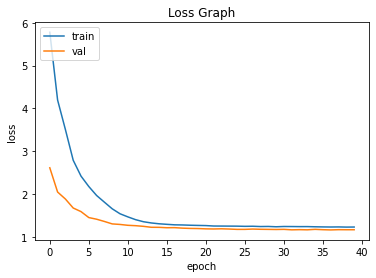

In [ ]:
from matplotlib import pyplot as plt
plt.plot(answer.history['loss'])
plt.plot(answer.history['val_loss'])
plt.title('Loss Graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

As you can see above, the training loss ends up at around 1.2 and the val loss is around the same, showing that the model did not overfit.

In [ ]:
y_prediction = model.predict(X_test)
print((y_prediction[0:10])) #print out some predictions to make sure they are between 0 and 5
print(y_prediction.max())
print(y_prediction.min())

[[3.611653 ]
 [3.5684063]
 [3.6352432]
 [3.648843 ]
 [3.596571 ]
 [3.6067119]
 [3.5906343]
 [3.615587 ]
 [3.630107 ]
 [2.6903596]]
4.867549
0.4249959


As you can see the max rating from the predictions is around 5 and the min is around .5, showing there is good variation between the ratings. 

# **RMSE using the training dataset**

In [ ]:
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_prediction, y_test))))

RMSE: 1.0742452144622803


As you can see, the RMSE using the training dataset is around 1.07, which is not bad. 

**2. Testing Part**

I do the same thing with the test dataset (get embeddings and make the 2d matrix) so that I can pass it into the model to calculate the model's RMSE with an unseen dataset

In [ ]:
test = test.rename(columns={'userId': 'user_id', 'movieId': 'item_id'})
X = test[['user_id', 'item_id']]
y = test['rating']
# Prepare data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
matrix_fact_test = KernelMF(n_epochs = 75, n_factors = 30, lr = 0.001, reg = 0.00001) # more than 200 epochs, val rmse was way higher => overfitting set reg to that to prevent overfitting and seems to work
matrix_fact_test.fit(X_train, y_train) #more than 10 n_factors and it was overfitting
matrix_fact_test_val = KernelMF(n_epochs = 75, n_factors = 30, lr = 0.001, reg = 0.00001)
matrix_fact_test_val.fit(X_test, y_test)

Epoch  1 / 75  -  train_rmse: 1.129763494145136
Epoch  2 / 75  -  train_rmse: 1.1099931659158362
Epoch  3 / 75  -  train_rmse: 1.0934120944822194
Epoch  4 / 75  -  train_rmse: 1.0793685601401952
Epoch  5 / 75  -  train_rmse: 1.067316423927595
Epoch  6 / 75  -  train_rmse: 1.0568507474186613
Epoch  7 / 75  -  train_rmse: 1.0476673605953226
Epoch  8 / 75  -  train_rmse: 1.0395016364897238
Epoch  9 / 75  -  train_rmse: 1.0321894759572925
Epoch  10 / 75  -  train_rmse: 1.02557898267541
Epoch  11 / 75  -  train_rmse: 1.0195584228055243
Epoch  12 / 75  -  train_rmse: 1.0140364825255508
Epoch  13 / 75  -  train_rmse: 1.0089361691913308
Epoch  14 / 75  -  train_rmse: 1.004195342673503
Epoch  15 / 75  -  train_rmse: 0.9997695961171543
Epoch  16 / 75  -  train_rmse: 0.9956191708285823
Epoch  17 / 75  -  train_rmse: 0.9917086384690399
Epoch  18 / 75  -  train_rmse: 0.9880100395061838
Epoch  19 / 75  -  train_rmse: 0.984501192634112
Epoch  20 / 75  -  train_rmse: 0.981160517203726
Epoch  21 / 75  

KernelMF(gamma=0.03333333333333333, lr=0.001, n_epochs=75, n_factors=30,
         reg=1e-05)

In [ ]:
users = test['user_id'].tolist()
movies = test['item_id'].tolist()
movie_ratings = test['rating'].tolist()
test_genres = []
test_user_embedding = []
test_movie_embedding = []
test_user_info = []
test_y_test = []
for user in users:
  test_user_embedding.append(matrix_fact_test.user_features[matrix_fact_test.user_id_map.get(user)])
  test_user_list = users_list.loc[users_list.userId == user]
  test_user_list = test_user_list[['userId', 'age', 'zipcode', 'gender_F', 'gender_M', 'profession_administrator','profession_artist', 'profession_doctor', 'profession_educator', 'profession_engineer', 'profession_entertainment',  'profession_executive', 'profession_healthcare',  'profession_homemaker',  'profession_lawyer',  'profession_librarian', 'profession_marketing', 'profession_none', 'profession_other', 'profession_programmer', 'profession_retired', 'profession_salesman',  'profession_scientist', 'profession_student', 'profession_technician', 'profession_writer' ]].values.tolist()
  test_user_info.append(test_user_list)
for movie in movies:
  test_movie_embedding.append(matrix_fact_test.item_features[matrix_fact_test.item_id_map.get(movie)])
  test_full_movie_dataset =  ml_movies.loc[ml_movies.ml_movieId == movie]
  test_genre = test_full_movie_dataset[["genre_unknown", "Action", "Adventure", "Animation", "Family", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Music", "Mystery", "Romance", "Science Fiction", "Thriller", "War", "Western"]].values.tolist()
  test_genres.append(test_genre)
  test_y_test.append(movie_ratings[movie])
test_y_test = np.asarray(test_y_test)
print(np.shape(test_user_embedding))
print(np.shape(test_movie_embedding))
print(np.shape(test_genres))

(20000, 30)
(20000,)
(20000, 1, 19)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [ ]:
test_final_matrix = []
test_final_test_matrix = []
for i in range(0, 20000):
  test_matrix = []
  test_user_embedding[i] = [float(v) for v in user_embedding[i]]

  test_matrix.extend([a*b for a,b in zip(test_user_embedding[i],test_movie_embedding[i])])
  test_genre = [float(j) for j in test_genres[i][0]]
  test_matrix.extend(test_genre)
  test_matrix.extend([test_user_info[i][0][1]])
  for x in range (3 , 26):
    test_matrix.extend([test_user_info[i][0][x]])
  if (np.array(test_matrix).shape == (73,)):
    test_final_test_matrix.append(test_y_test[i])
    test_final_matrix.append(np.array(test_matrix, dtype=object))
test_final_matrix = np.asarray(test_final_matrix)
test_final_test_matrix = np.asarray(test_final_test_matrix)
print(np.shape(test_final_matrix))
print(np.shape(test_final_test_matrix))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]


(19957, 73)
(19957,)


In [ ]:
test_final_matrix = np.asarray(test_final_matrix).astype(np.float32)
test_y_prediction = model.predict(test_final_matrix)
print((test_y_prediction[0:10]))
print(test_y_prediction.max())
print(test_y_prediction.min())

[[3.6680582]
 [3.7332087]
 [3.9034302]
 [3.7186306]
 [2.9310985]
 [3.733142 ]
 [3.5959427]
 [2.5790863]
 [3.5973756]
 [3.9463756]]
4.7779365
0.3148694


# **RMSE of Hybrid Model**

In [ ]:
print('RMSE: {}'.format(np.sqrt(mean_squared_error(test_y_prediction, test_final_test_matrix))))

RMSE: 1.3409349094710783


As you can see above, the RMSE of the hybrid model using an unseen dataset. is around 1.3, which is not too bad. 

# **RMSE Comparison between Models:**

**Baseline Model:** 1.03

**Simple Model:**
  
  a. SVD: .96
  
  b. Turicreate: 1.04
  
  c. matrix_factorization: .96



**Hybrid Model:** 1.3